# Concurrent Data Loader

A continuación se desarrollan pruebas para evaluar el desempeño de dos tipos de data loaders de imágenes de pokemones:
- Iterador básico, que lee fila por fila del conjunto de archivos CSV que contienen la información de los pokemon 
- Iterador con enfoque productor-consumidor con espera en cola

## Preparación del entorno y los datos

In [1]:
# Establecer el path para importar desde src
import sys, os, pathlib
sys.path.append(os.path.abspath("src"))

In [2]:
# Descarga concurrente de imágenes de pokemones desde archivos CSV
# ---> Solo correr una vez para descargar concurrentemente las imágenes <---
from src.loader import main
from src.utils import ensure_dir
import glob

csv_files = glob.glob('data/pokemon-*.csv')
output_dir = 'output/pokemons'
ensure_dir(output_dir)

#main(csv_files, output_dir, num_threads=5)

In [3]:
# Verifica la descarga y cuenta el número de imágenes en todos los subdirectorios de output_dir
downloaded_images = glob.glob(os.path.join(output_dir, '**', '*.png'), recursive=True)
num_downloaded = len(downloaded_images)
print(f"Número de imágenes descargadas (incluyendo subdirectorios): {num_downloaded}")
print(f"Tipos de pokemones descargados: {set(os.path.basename(os.path.dirname(img)) for img in downloaded_images)}")

Número de imágenes descargadas (incluyendo subdirectorios): 721
Tipos de pokemones descargados: {'ghost', 'fighting', 'electric', 'fairy', 'fire', 'grass', 'ice', 'psychic', 'dragon', 'ground', 'rock', 'steel', 'bug', 'water', 'normal', 'flying', 'poison', 'dark'}


## Ejecución del iterador básico

In [4]:
# Definir el directorio de datos y buscar archivos CSV
import glob
import os
from src.utils import ensure_dir
data_dir = 'data'
csv_files = glob.glob(os.path.join(data_dir, '*.csv'))
print(f'Se encontraron {len(csv_files)} archivos CSV en {data_dir}')

Se encontraron 6 archivos CSV en data


22:21:57: Iterador básico: imagen (bulbasaur) cargada en 0.01135s


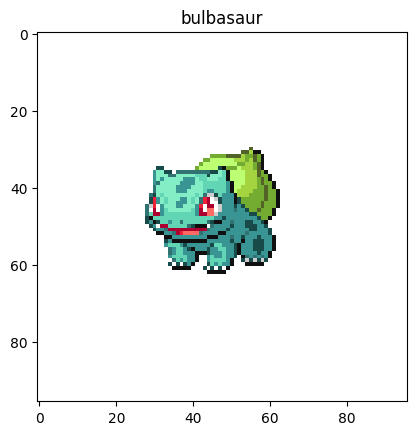

22:21:57: Iterador básico: imagen (ivysaur) cargada en 0.00052s
22:21:57: Iterador básico: imagen (venusaur) cargada en 0.00046s
22:21:57: Iterador básico: imagen (charmander) cargada en 0.00079s
22:21:57: Iterador básico: imagen (charmeleon) cargada en 0.00031s
22:21:57: Iterador básico: imagen (charizard) cargada en 0.00035s
22:21:57: Iterador básico: imagen (squirtle) cargada en 0.00027s
22:21:57: Iterador básico: imagen (wartortle) cargada en 0.00026s
22:21:57: Iterador básico: imagen (blastoise) cargada en 0.00024s
22:21:57: Iterador básico: imagen (caterpie) cargada en 0.00023s
22:21:57: Iterador básico: imagen (metapod) cargada en 0.00022s
22:21:57: Iterador básico: imagen (butterfree) cargada en 0.00026s
22:21:57: Iterador básico: imagen (weedle) cargada en 0.00042s
22:21:57: Iterador básico: imagen (kakuna) cargada en 0.00033s
22:21:57: Iterador básico: imagen (beedrill) cargada en 0.00025s
22:21:57: Iterador básico: imagen (pidgey) cargada en 0.00023s
22:21:57: Iterador básic

721

In [5]:
from src.iterator import test_iterator
# Directorio donde se encuentran las imagenes descargadas
img_dir = 'output/pokemons'
ensure_dir(img_dir)
# Directorio para guardar los tiempos de carga de las imagenes
times_dir = 'output/tiempos'
ensure_dir(times_dir)
# Archivo para almacenar los tiempos de carga
times_file = os.path.join(times_dir, 'iterador_basico_tiempos.csv')
test_iterator(csv_files, img_dir, times_file)

## Ejecucion del iterador con cola

22:21:58: Productor: bulbasaur añadido a la fila
22:21:58: Productor-Consumidor: imagen (bulbasaur) cargada en 0.00163s
22:21:58: Productor: ivysaur añadido a la fila
22:21:58: Productor: venusaur añadido a la fila
22:21:58: Productor: charmander añadido a la fila
22:21:58: Productor: charmeleon añadido a la fila
22:21:58: Productor: charizard añadido a la fila
22:21:58: Productor: squirtle añadido a la fila
22:21:58: Productor: wartortle añadido a la fila
22:21:58: Productor: blastoise añadido a la fila
22:21:58: Productor: caterpie añadido a la fila
22:21:58: Productor: metapod añadido a la fila
22:21:58: Productor: butterfree añadido a la fila
22:21:58: Productor: weedle añadido a la fila
22:21:58: Productor: kakuna añadido a la fila
22:21:58: Productor: beedrill añadido a la fila
22:21:58: Productor: pidgey añadido a la fila
22:21:58: Productor: pidgeotto añadido a la fila
22:21:58: Productor: pidgeot añadido a la fila
22:21:58: Productor: rattata añadido a la fila
22:21:58: Produc

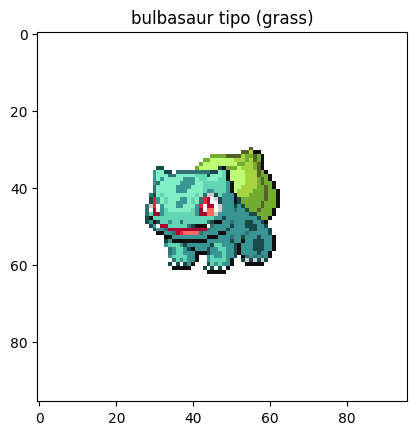

22:21:58: Productor: fearow añadido a la fila
22:21:58: Productor-Consumidor: imagen (ivysaur) cargada en 0.00088s
22:21:58: Productor: ekans añadido a la fila
22:21:58: Productor-Consumidor: imagen (venusaur) cargada en 0.00072s
22:21:58: Productor: arbok añadido a la fila
22:21:58: Productor-Consumidor: imagen (charmander) cargada en 0.00067s
22:21:58: Productor: pikachu añadido a la fila
22:21:58: Productor-Consumidor: imagen (charmeleon) cargada en 0.00065s
22:21:58: Productor: raichu añadido a la fila
22:21:58: Productor-Consumidor: imagen (charizard) cargada en 0.00078s
22:21:58: Productor: sandshrew añadido a la fila
22:21:58: Productor-Consumidor: imagen (squirtle) cargada en 0.00081s
22:21:58: Productor: sandslash añadido a la fila
22:21:58: Productor-Consumidor: imagen (wartortle) cargada en 0.00092s
22:21:58: Productor: nidoran-f añadido a la fila
22:21:58: Productor-Consumidor: imagen (blastoise) cargada en 0.00079s
22:21:58: Productor: nidorina añadido a la fila
22:21:58: 

721

In [6]:
from src.iterator import test_pipeline
# CSV para almacenar los tiempos del iterador con pipeline
pipeline_times_file = os.path.join(times_dir, 'pipeline_tiempos.csv')
test_pipeline(csv_files, img_dir, csv_output=pipeline_times_file) # La cola por defecto es de tamaño 20

# Evaluacion del desempeño
1- Se analizarán las estadísticas de los tiempos de descarga


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los csv de tiempos y calcular estadísticas
iterator_times = pd.read_csv(times_file)
queue_times = pd.read_csv(pipeline_times_file)

Estadísticas de tiempos de carga (segundos):
                Iterativo  Productor-Consumidor
Media            0.000357              0.001266
Mediana          0.000290              0.000960
Desv. Estándar   0.000442              0.002247
Mínimo           0.000180              0.000310
Máximo           0.011350              0.035410
Suma total       0.257400              0.912890


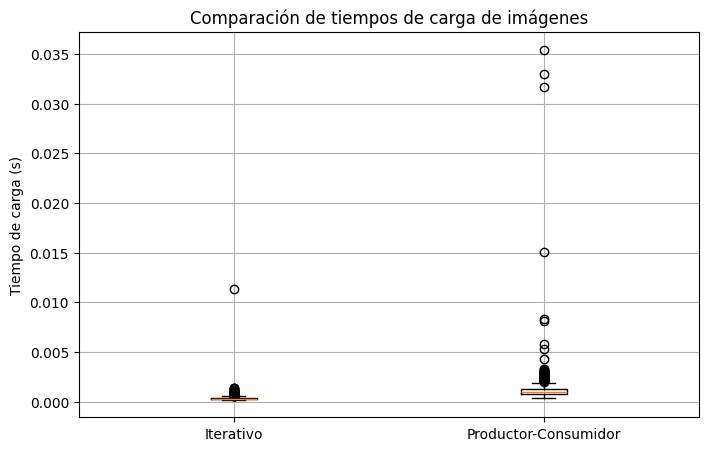

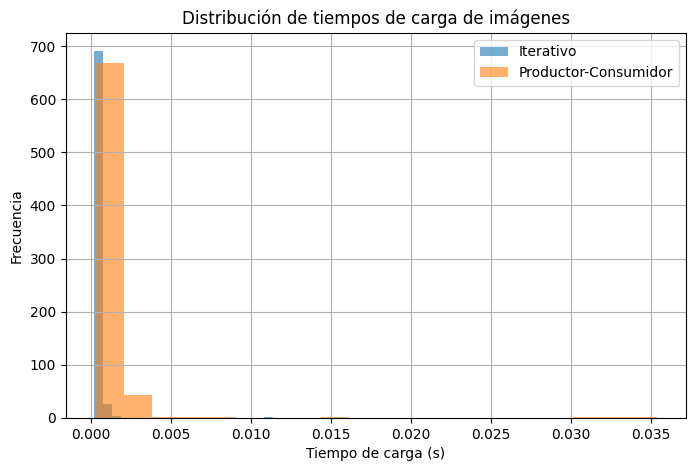

,Iterativo,Productor-Consumidor
Media,0.000357,0.001266
Mediana,0.000290,0.000960
Desv. Estándar,0.000442,0.002247
Mínimo,0.000180,0.000310
Máximo,0.011350,0.035410
Suma total,0.257400,0.912890


In [8]:
from src.utils import analyze_load_times
# Analizar y graficar los tiempos de carga
analyze_load_times(times_file, pipeline_times_file)

Podemos ver que los tiempos de carga no mejoran usando el enfoque productor-consumidor. Probmos qué pasa si se juega con diferentes tamaños de cola, usando 5 configuraciones diferentes (5,10,20,30,50) y comparemos los tiempos de cada configuracion con el iterativo


Probando 5 tamaños de cola diferentes: [5, 10, 30, 50, 100]
Cola tamaño 5: 721 imágenes procesadas en 0.19 segundos
Cola tamaño 10: 721 imágenes procesadas en 0.16 segundos
Cola tamaño 30: 721 imágenes procesadas en 0.17 segundos
Cola tamaño 50: 721 imágenes procesadas en 0.15 segundos
Cola tamaño 100: 721 imágenes procesadas en 0.15 segundos

Resumen guardado en output\tiempos\queue_sizes\queue_sizes_summary.csv
Resultados por tamaño de cola:


,queue_size,processed_images,total_time,avg_time,median_time,min_time,max_time
0,5,721,0.188979,0.000246,0.00018,0.00014,0.00131
1,10,721,0.155284,0.000201,0.00017,0.00014,0.00103
2,30,721,0.167339,0.000218,0.00017,0.00012,0.00139
3,50,721,0.148477,0.000192,0.00016,0.00012,0.00186
4,100,721,0.151978,0.000197,0.00017,0.00012,0.00128


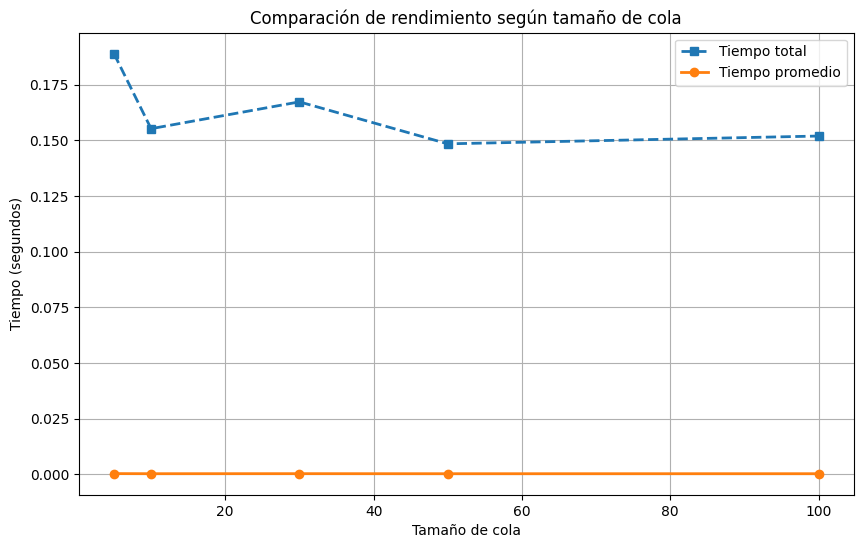

In [9]:
# Probar diferentes tamaños de cola
from src.queue_tester import test_different_queue_sizes, plot_queue_performance
queue_sizes = [5, 10, 30, 50, 100]
queue_performance = test_different_queue_sizes(csv_files, img_dir, queue_sizes)

# Mostrar tabla de resultados
print("Resultados por tamaño de cola:")
display(queue_performance)
plot_queue_performance(queue_performance)

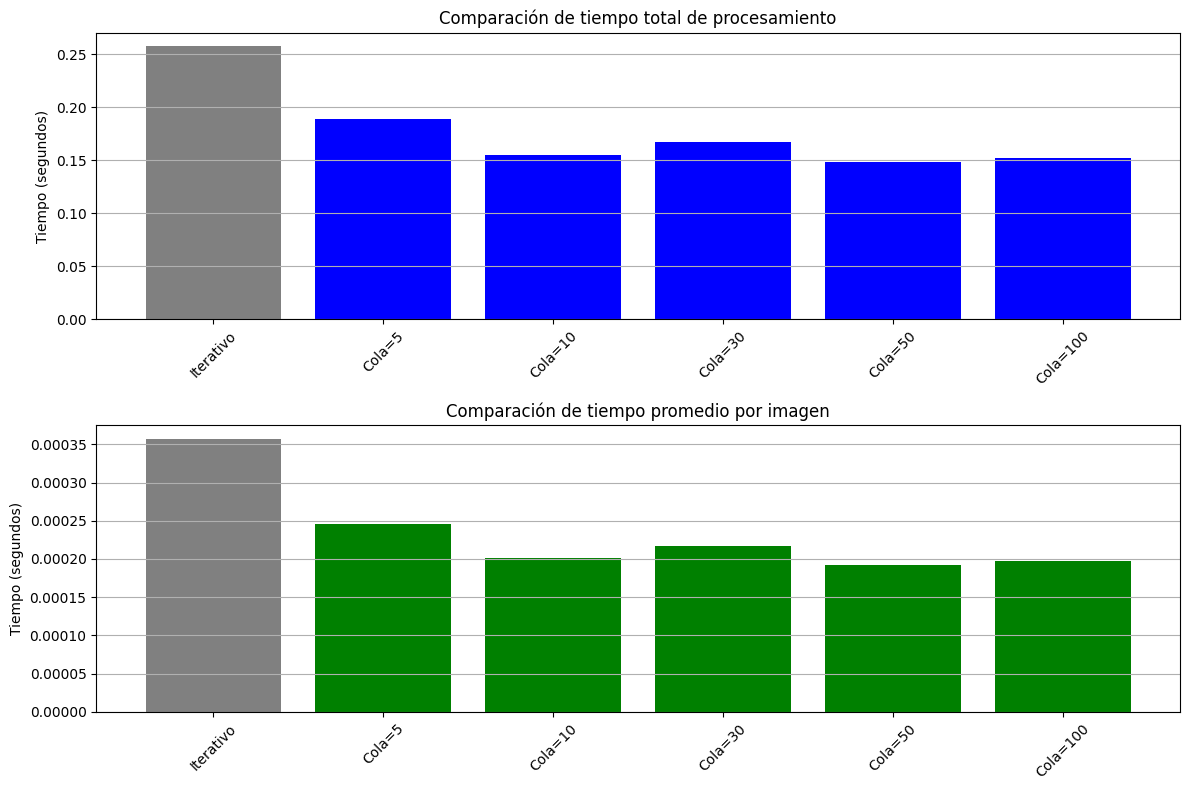

Comparación con iterador básico:


,Método,Tiempo total (s),Tiempo promedio (s),Imágenes
0,Iterativo,0.257400,0.000357,721
1,Cola=5,0.188979,0.000246,721
2,Cola=10,0.155284,0.000201,721
3,Cola=30,0.167339,0.000218,721
4,Cola=50,0.148477,0.000192,721
5,Cola=100,0.151978,0.000197,721


In [10]:
from src.queue_tester import compare_with_basic_iterator
# Comparar con el iterador básico
comparison_summary = compare_with_basic_iterator(queue_performance, times_file, queue_sizes)

# Mostrar tabla comparativa
print("Comparación con iterador básico:")
display(comparison_summary)